In [2]:
import numpy as np
import struct
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import pandas as pd
import seaborn as sns

# Read in the Training Images/Labels

In [3]:
def read_idx3(fp):
    with open(fp, 'rb') as f:
        magic_number, num_images, num_rows, num_cols = struct.unpack('>IIII', f.read(16))
        images = np.frombuffer(f.read(), dtype=np.uint8)
        images = images.reshape(num_images, num_rows, num_cols)
        return images

In [4]:
def read_idx1(fp):
    with open(fp, 'rb') as f:
        magic_number, num_labels = struct.unpack('>II', f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        return labels

In [5]:
train_images = read_idx3('data/train-images.idx3-ubyte')
train_images = train_images.astype(np.float64)
train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels = read_idx1('data/train-labels.idx1-ubyte')
train_labels = train_labels.astype(int)
train_labels

array([5, 0, 4, ..., 5, 6, 8])

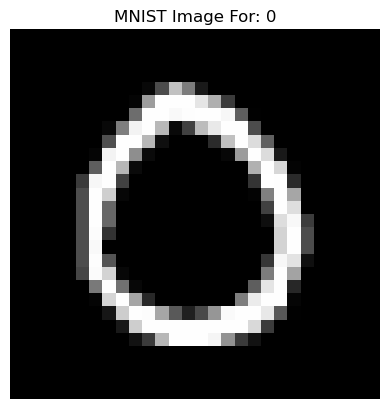

In [8]:
plt.imshow(train_images[2340], cmap='gray')
plt.title(f'MNIST Image For: {train_labels[2340]}')
plt.axis('off')
plt.show()

In [9]:
test_images = read_idx3('data/t10k-images.idx3-ubyte')
test_images = test_images.astype(np.float64)
test_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
test_labels = read_idx1('data/t10k-labels.idx1-ubyte')
test_labels = test_labels.astype(int)
test_labels

array([7, 2, 1, ..., 4, 5, 6])

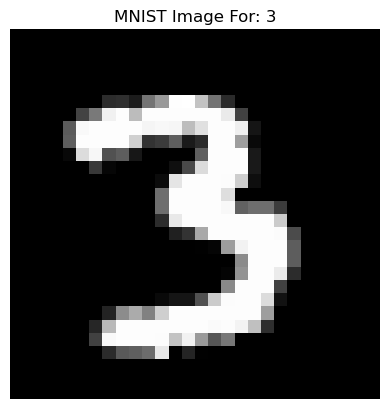

In [12]:
plt.imshow(test_images[500], cmap='gray')
plt.title(f'MNIST Image For: {test_labels[500]}')
plt.axis('off')
plt.show()

# Data Prep

In [13]:
num_subsets = np.array([10000, 5000, 1000])

train_images_reshaped = train_images.reshape(train_images.shape[0], -1) / 255.0
test_images_reshaped = test_images.reshape(test_images.shape[0], -1) / 255.0

# Random Sampling

In [ ]:
accuracy_dict = {}

for j in range(3):
    accuracy_scores = []

    # Perform classification for different subset sizes
    for k in num_subsets:

        # Efficient subset selection using numpy random choice
        train_subset = np.random.choice(train_images_reshaped.shape[0], size=k, replace=False)

        # Select prototype images and labels
        prototype_images = train_images_reshaped[train_subset]
        prototype_labels = train_labels[train_subset]


        # Compute distances between all test images and prototype images
        distances = cdist(test_images_reshaped, prototype_images)

        # Find the index of the nearest prototype for each test image
        nearest_indices = np.argmin(distances, axis=1)

        # Predict labels based on nearest prototype
        predicted_labels = prototype_labels[nearest_indices]

        # Calculate accuracy for this subset
        accuracy = np.mean(predicted_labels == test_labels)
        accuracy_scores.append(accuracy)
    
    accuracy_dict[j+1] = accuracy_scores

In [15]:
accuracy_dict

{0: [0.948, 0.9373, 0.8883],
 1: [0.9494, 0.936, 0.8887],
 2: [0.9487, 0.9375, 0.8806]}

In [16]:
accuracy_df = pd.DataFrame(accuracy_dict)
accuracy_df

,0,1,2
0,0.9480,0.9494,0.9487
1,0.9373,0.9360,0.9375
2,0.8883,0.8887,0.8806


In [17]:
accuracy_df.mean(axis=1)

0    0.948700
1    0.936933
2    0.885867
dtype: float64

In [19]:
accuracy_df.std(axis=1)

0    0.000700
1    0.000814
2    0.004565
dtype: float64

In [23]:
from scipy.stats import t

In [27]:
t.ppf(0.995, df = 3 - 1)

9.92484320091807

In [26]:
[accuracy_df.mean(axis=1) - 4.303 * (accuracy_df.std(axis=1) / np.sqrt(3)), accuracy_df.mean(axis=1) + 4.303 * (accuracy_df.std(axis=1) / np.sqrt(3))]

[0    0.946961
 1    0.934910
 2    0.874525
 dtype: float64,
 0    0.950439
 1    0.938957
 2    0.897209
 dtype: float64]

In [29]:
[accuracy_df.mean(axis=1) - 9.928 * (accuracy_df.std(axis=1) / np.sqrt(3)), accuracy_df.mean(axis=1) + 9.928 * (accuracy_df.std(axis=1) / np.sqrt(3))]

[0    0.944688
 1    0.932265
 2    0.859698
 dtype: float64,
 0    0.952712
 1    0.941602
 2    0.912036
 dtype: float64]

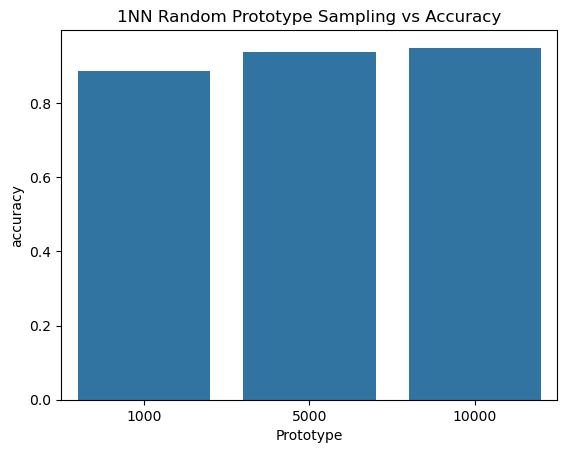

In [18]:

df = pd.DataFrame({
    'Prototype': num_subsets,
    'accuracy': accuracy_df.mean(axis=1)
})
sns.barplot(x='Prototype', y='accuracy', data = df)
plt.title('1NN Random Prototype Sampling vs Accuracy')
plt.show()

# K Means Prototyping

In [17]:
from sklearn.cluster import MiniBatchKMeans

## K Means

In [18]:
def run_kmeans(num_clusters):
    kmeans = MiniBatchKMeans(n_clusters=num_clusters, init = 'random', batch_size=1000, random_state=42)
    kmeans.fit(train_images_reshaped)
    centroids = kmeans.cluster_centers_

    labels = np.zeros(num_clusters, dtype=int)

    for i in range(num_clusters):
        cluster_incidies = np.where(kmeans.labels_ == i)[0]

        if len(cluster_incidies) == 0:
            labels[i] = -1
            continue

        cluster_labels = train_labels[cluster_incidies]
        labels[i] = np.bincount(cluster_labels).argmax()
    return centroids, labels

In [21]:
accuracy_scores = []

for k in num_subsets:

    # Efficient subset selection using numpy random choice
    knn_centroids, knn_labels = run_kmeans(k)

    # Compute distances between all test images and prototype images
    distances = cdist(test_images_reshaped, knn_centroids)

    # Find the index of the nearest prototype for each test image
    nearest_indices = np.argmin(distances, axis=1)

    # Predict labels based on nearest prototype
    predicted_labels = knn_labels[nearest_indices]

    # Calculate accuracy for this subset
    accuracy = np.mean(predicted_labels == test_labels)
    accuracy_scores.append(accuracy)

In [22]:
accuracy_scores = np.array(accuracy_scores)
accuracy_scores

array([0.9592, 0.9542, 0.9372])

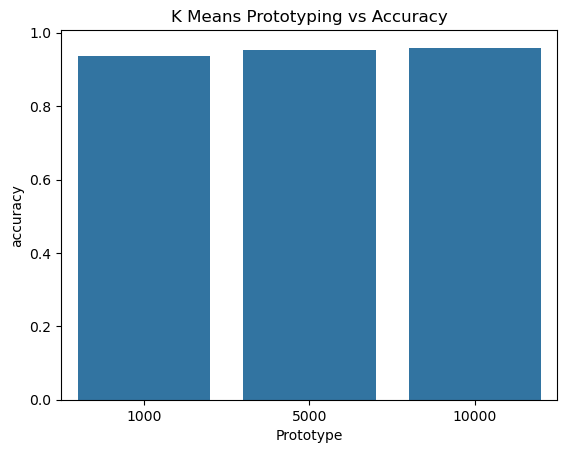

In [23]:
df = pd.DataFrame({"Prototype": num_subsets, "accuracy": accuracy_scores})
sns.barplot(x="Prototype", y="accuracy", data=df)
plt.title("K Means Prototyping vs Accuracy")
plt.show()

## K Means++

In [24]:
def run_kmeans_plus(num_clusters):
    kmeans = MiniBatchKMeans(n_clusters=num_clusters, init = 'k-means++', batch_size=1000, random_state=42)
    kmeans.fit(train_images_reshaped)
    centroids = kmeans.cluster_centers_

    labels = np.zeros(num_clusters, dtype=int)

    for i in range(num_clusters):
        cluster_incidies = np.where(kmeans.labels_ == i)[0]

        if len(cluster_incidies) == 0:
            labels[i] = -1
            continue

        cluster_labels = train_labels[cluster_incidies]
        labels[i] = np.bincount(cluster_labels).argmax()
    return centroids, labels

In [25]:
accuracy_scores = []

for k in num_subsets:

    # Efficient subset selection using numpy random choice
    knn_centroids, knn_labels = run_kmeans_plus(k)

    # Compute distances between all test images and prototype images
    distances = cdist(test_images_reshaped, knn_centroids)

    # Find the index of the nearest prototype for each test image
    nearest_indices = np.argmin(distances, axis=1)

    # Predict labels based on nearest prototype
    predicted_labels = knn_labels[nearest_indices]

    # Calculate accuracy for this subset
    accuracy = np.mean(predicted_labels == test_labels)
    accuracy_scores.append(accuracy)

In [26]:
accuracy_scores = np.array(accuracy_scores)
accuracy_scores

array([0.9555, 0.9552, 0.9368])

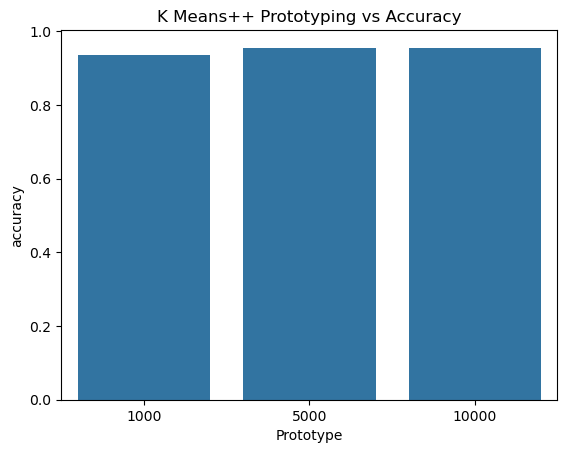

In [27]:
df = pd.DataFrame({"Prototype": num_subsets, "accuracy": accuracy_scores})
sns.barplot(x="Prototype", y="accuracy", data=df)
plt.title("K Means++ Prototyping vs Accuracy")
plt.show()

## K Means + Sampling

In [28]:
samp_size = np.array([45000, 30000, 15000])

## K Means

In [29]:
def run_kmeans_samp(samp_size, num_clusters):
    train_subset = np.random.choice(train_images_reshaped.shape[0], size=samp_size, replace=False)
    prototype_images = train_images_reshaped[train_subset]
    prototype_labels = train_labels[train_subset]

    kmeans = MiniBatchKMeans(n_clusters=num_clusters, init = 'random', batch_size=1000, random_state=42)
    kmeans.fit(prototype_images)
    centroids = kmeans.cluster_centers_

    labels = np.zeros(num_clusters, dtype=int)

    for i in range(num_clusters):
        cluster_incidies = np.where(kmeans.labels_ == i)[0]

        if len(cluster_incidies) == 0:
            labels[i] = -1
            continue

        cluster_labels = prototype_labels[cluster_incidies]
        labels[i] = np.bincount(cluster_labels).argmax()
    return centroids, labels

In [30]:
run_dict_basic = {}

for i in range(3):
    accuracy_dict = {}

    for j in samp_size:

        accuracy_scores = []

        for k in num_subsets:

            # Efficient subset selection using numpy random choice
            knn_centroids, knn_labels = run_kmeans_samp(j, k)

            # Compute distances between all test images and prototype images
            distances = cdist(test_images_reshaped, knn_centroids)

            # Find the index of the nearest prototype for each test image
            nearest_indices = np.argmin(distances, axis=1)

            # Predict labels based on nearest prototype
            predicted_labels = knn_labels[nearest_indices]

            # Calculate accuracy for this subset
            accuracy = np.mean(predicted_labels == test_labels)
            accuracy_scores.append(accuracy)
        
        accuracy_dict[j] = accuracy_scores
    run_dict_basic[i+1] = accuracy_dict


In [31]:
run_dict_basic

{1: {45000: [0.9573, 0.9489, 0.9343],
  30000: [0.9436, 0.9509, 0.9328],
  15000: [0.9304, 0.9392, 0.9205]},
 2: {45000: [0.9597, 0.9504, 0.9352],
  30000: [0.9521, 0.95, 0.9265],
  15000: [0.9331, 0.9414, 0.9225]},
 3: {45000: [0.954, 0.9521, 0.9316],
  30000: [0.9439, 0.947, 0.93],
  15000: [0.9368, 0.9369, 0.9141]}}

In [48]:
ss_basic = pd.DataFrame()
for i in run_dict_basic:
    temp_df = pd.DataFrame.from_dict(run_dict_basic[i], orient='index')
    ss_basic = pd.concat([ss_basic, temp_df])
ss_basic.columns = num_subsets
ss_basic = ss_basic.reset_index().rename(columns={'index': 'samp_size'})
ss_basic

,samp_size,10000,5000,1000
0,45000,0.9573,0.9489,0.9343
1,30000,0.9436,0.9509,0.9328
2,15000,0.9304,0.9392,0.9205
3,45000,0.9597,0.9504,0.9352
4,30000,0.9521,0.9500,0.9265
5,15000,0.9331,0.9414,0.9225
6,45000,0.9540,0.9521,0.9316
7,30000,0.9439,0.9470,0.9300
8,15000,0.9368,0.9369,0.9141


## K Means++

In [32]:
def run_kmeans_plus_samp(samp_size, num_clusters):
    train_subset = np.random.choice(train_images_reshaped.shape[0], size=samp_size, replace=False)
    prototype_images = train_images_reshaped[train_subset]
    prototype_labels = train_labels[train_subset]

    kmeans = MiniBatchKMeans(n_clusters=num_clusters, init = 'k-means++', batch_size=1000, random_state=42)
    kmeans.fit(prototype_images)
    centroids = kmeans.cluster_centers_

    labels = np.zeros(num_clusters, dtype=int)

    for i in range(num_clusters):
        cluster_incidies = np.where(kmeans.labels_ == i)[0]

        if len(cluster_incidies) == 0:
            labels[i] = -1
            continue

        cluster_labels = prototype_labels[cluster_incidies]
        labels[i] = np.bincount(cluster_labels).argmax()
    return centroids, labels

In [33]:
run_dict_plus ={}

for i in range(3):
    accuracy_dict = {}

    for j in samp_size:

        accuracy_scores = []

        for k in num_subsets:

            # Efficient subset selection using numpy random choice
            knn_centroids, knn_labels = run_kmeans_plus_samp(j, k)

            # Compute distances between all test images and prototype images
            distances = cdist(test_images_reshaped, knn_centroids)

            # Find the index of the nearest prototype for each test image
            nearest_indices = np.argmin(distances, axis=1)

            # Predict labels based on nearest prototype
            predicted_labels = knn_labels[nearest_indices]

            # Calculate accuracy for this subset
            accuracy = np.mean(predicted_labels == test_labels)
            accuracy_scores.append(accuracy)
        
        accuracy_dict[j] = accuracy_scores
    
    run_dict_plus[i+1] = accuracy_dict


In [34]:
run_dict_plus

{1: {45000: [0.9563, 0.9515, 0.9329],
  30000: [0.9467, 0.9464, 0.9301],
  15000: [0.9385, 0.9411, 0.9217]},
 2: {45000: [0.9545, 0.9479, 0.9356],
  30000: [0.9563, 0.9499, 0.9249],
  15000: [0.9392, 0.9417, 0.9167]},
 3: {45000: [0.959, 0.9515, 0.937],
  30000: [0.949, 0.9463, 0.9259],
  15000: [0.939, 0.9433, 0.9197]}}

In [49]:
ss_plus = pd.DataFrame()
for i in run_dict_plus:
    temp_df = pd.DataFrame.from_dict(run_dict_plus[i], orient='index')
    ss_plus = pd.concat([ss_plus, temp_df])
ss_plus.columns = num_subsets
ss_plus = ss_plus.reset_index().rename(columns={'index': 'samp_size'})
ss_plus

,samp_size,10000,5000,1000
0,45000,0.9563,0.9515,0.9329
1,30000,0.9467,0.9464,0.9301
2,15000,0.9385,0.9411,0.9217
3,45000,0.9545,0.9479,0.9356
4,30000,0.9563,0.9499,0.9249
5,15000,0.9392,0.9417,0.9167
6,45000,0.9590,0.9515,0.9370
7,30000,0.9490,0.9463,0.9259
8,15000,0.9390,0.9433,0.9197
